In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('../routing/data/df500.csv')
#df = pd.read_csv('../routing/data/df_save.csv')
print(list(df.columns))
df = df.loc[df['length_km_shortest_path']<2,:]
print('shape = ',df.shape)
df = df.dropna()

df['interv_dist_shortest_path'] = df['interv_dist_shortest_path'] / 10
df['interv_dist_best_interv_dist'] = df['interv_dist_best_interv_dist'] / 10
df['interv_dist_best_co2'] = df['interv_dist_best_co2'] / 10

df['length_km_shortest_path'] = df['length_km_shortest_path'] * 1000
df['length_km_best_interv_dist'] = df['length_km_best_interv_dist'] * 1000
df['length_km_best_co2'] = df['length_km_best_co2'] * 1000

df.head(2)

['od', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'length_km_shortest_path', 'interv_dist_shortest_path', 'co2_shortest_path', 'length_km_best_interv_dist', 'interv_dist_best_interv_dist', 'co2_best_interv_dist', 'best_interv_dist_is_shortest', 'length_km_best_co2', 'interv_dist_best_co2', 'co2_best_co2', 'best_co2_is_shortest']
shape =  (167, 16)


,od,start_latitude,start_longitude,end_latitude,end_longitude,length_km_shortest_path,interv_dist_shortest_path,co2_shortest_path,length_km_best_interv_dist,interv_dist_best_interv_dist,co2_best_interv_dist,best_interv_dist_is_shortest,length_km_best_co2,interv_dist_best_co2,co2_best_co2,best_co2_is_shortest
1,"(18653542, 203902488)",53.550973,9.985199,53.547453,10.000780,1337.492,26.026065,0.203267,1337.492,26.026065,0.203267,True,1337.492,26.026065,0.203267,True
2,"(21112791, 36589966)",53.564028,9.987860,53.550821,9.980512,1939.314,38.753822,0.293114,2247.143,36.133061,0.316750,False,1939.314,38.753822,0.293114,True


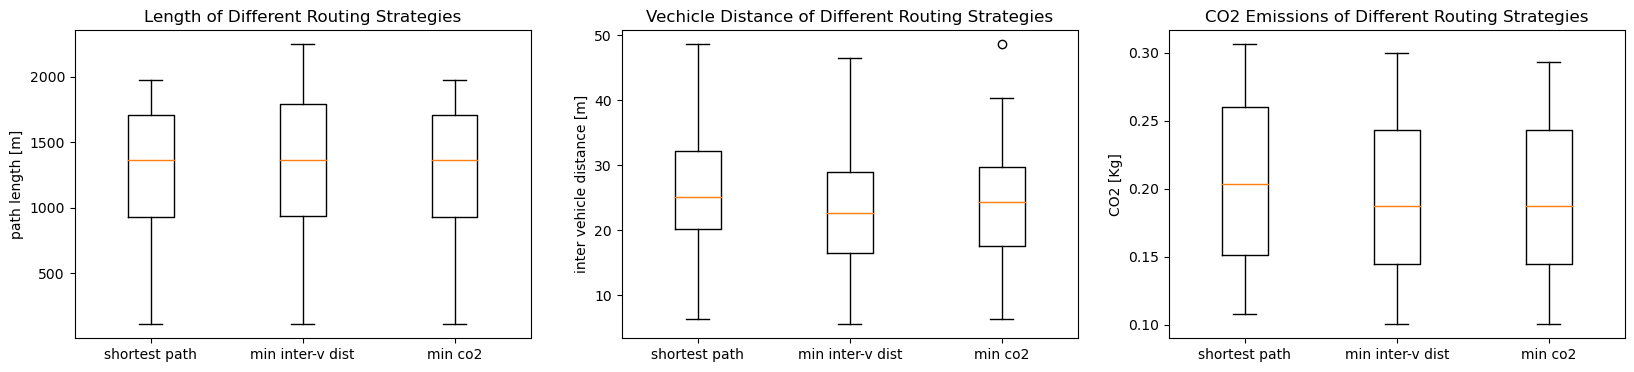

In [46]:
plt.figure(figsize = (20, 4))
plt.subplot(1, 3, 1)
plt.boxplot(df[['length_km_shortest_path','length_km_best_interv_dist','length_km_best_co2']])
plt.xticks([1,2,3], ['shortest path','min inter-v dist','min co2'])
plt.ylabel('path length [m]')
plt.title('Length of Different Routing Strategies')

plt.subplot(1, 3, 2)
plt.boxplot(df.loc[df['interv_dist_best_interv_dist'] < df['interv_dist_shortest_path'],['interv_dist_shortest_path','interv_dist_best_interv_dist','interv_dist_best_co2']])
plt.xticks([1,2,3], ['shortest path','min inter-v dist','min co2'])
plt.ylabel('inter vehicle distance [m]')
plt.title('Vechicle Distance of Different Routing Strategies')

xdf = df
#xdf['co2_best_co2'] = xdf['co2_best_co2'] - 0.005
plt.subplot(1, 3, 3)
plt.boxplot(df.loc[xdf['co2_best_co2'] < xdf['co2_shortest_path'],['co2_shortest_path','co2_best_interv_dist','co2_best_co2']])
plt.xticks([1,2,3], ['shortest path','min inter-v dist','min co2'])
plt.ylabel('CO2 [Kg]')
plt.title('CO2 Emissions of Different Routing Strategies')
plt.savefig('images/routing1.pdf',bbox_inches='tight')  
plt.show()

In [47]:
df['co2_saving'] = df['co2_shortest_path'] - df['co2_best_co2']
df['co2_saving_pc'] = df['co2_saving'] / df['co2_shortest_path']
print('% CO2 Saving = ',df.loc[df['co2_saving_pc']>0,'co2_saving_pc'].mean()*100)
print('% Time there is saving = ',df.loc[df['co2_saving_pc']>0,'co2_saving_pc'].shape[0] / df.shape[0] * 100)

% CO2 Saving =  4.965465874420434
% Time there is saving =  9.580838323353294


In [48]:
df['ivd_saving'] = df['interv_dist_shortest_path'] - df['interv_dist_best_interv_dist']
df['ivd_saving_pc'] = df['ivd_saving'] / df['interv_dist_shortest_path']
print('% Inter-vehicle Saving = ',df.loc[df['ivd_saving_pc']>0,'ivd_saving_pc'].mean()*100)
print('% Time there is saving = ',df.loc[df['ivd_saving_pc']>0,'ivd_saving_pc'].shape[0] / df.shape[0] * 100)

% Inter-vehicle Saving =  11.816118502175655
% Time there is saving =  25.748502994011975
